# Asignatura: Laboratorio de Implementación III

## Gráficos de ventas

#### Gráficos de ventas totales por período

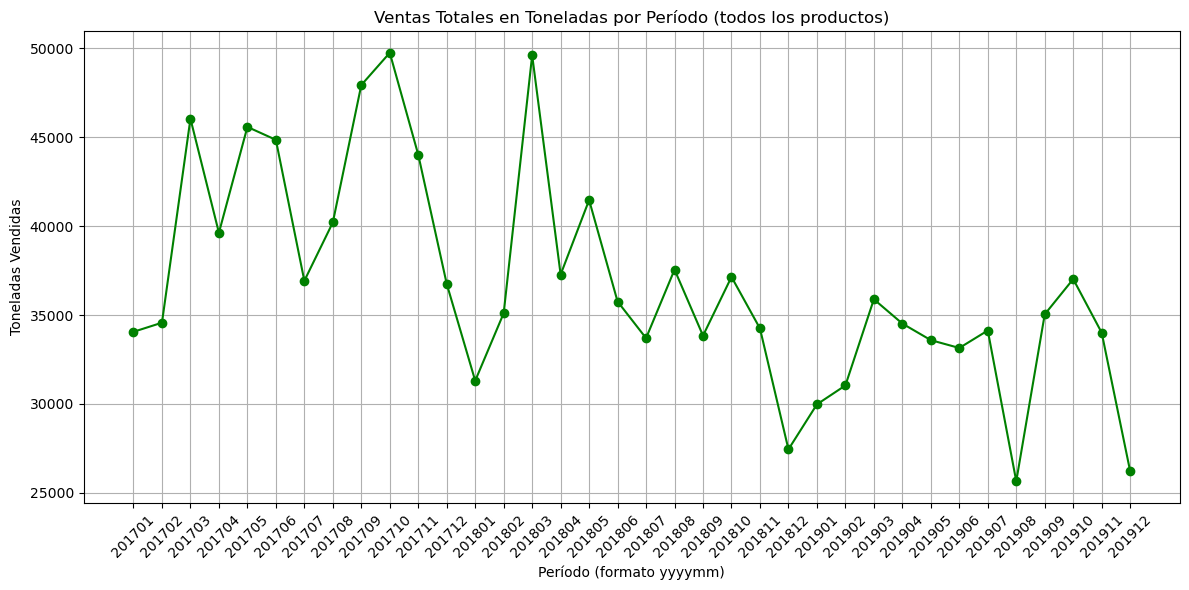

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar solo el archivo sell-in
df_sellin = pd.read_csv(r'C:\Users\macar\Documents\Maestria Data Science - Austral\LABORATORIO 3\Datasets básicos iniciales Competencia\sell-in.txt', sep="\t")

# Agrupar por período, sumando todas las toneladas vendidas
ventas_totales = df_sellin.groupby('periodo')['tn'].sum().reset_index()

# Asegurar que el período sea string para mejor visualización
ventas_totales['periodo'] = ventas_totales['periodo'].astype(str)

# Crear el gráfico
plt.figure(figsize=(12, 6))
plt.plot(ventas_totales['periodo'], ventas_totales['tn'], marker='o', linestyle='-', color='green')
plt.title('Ventas Totales en Toneladas por Período (todos los productos)')
plt.xlabel('Período (formato yyyymm)')
plt.ylabel('Toneladas Vendidas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Gráficos de ventas por producto y período

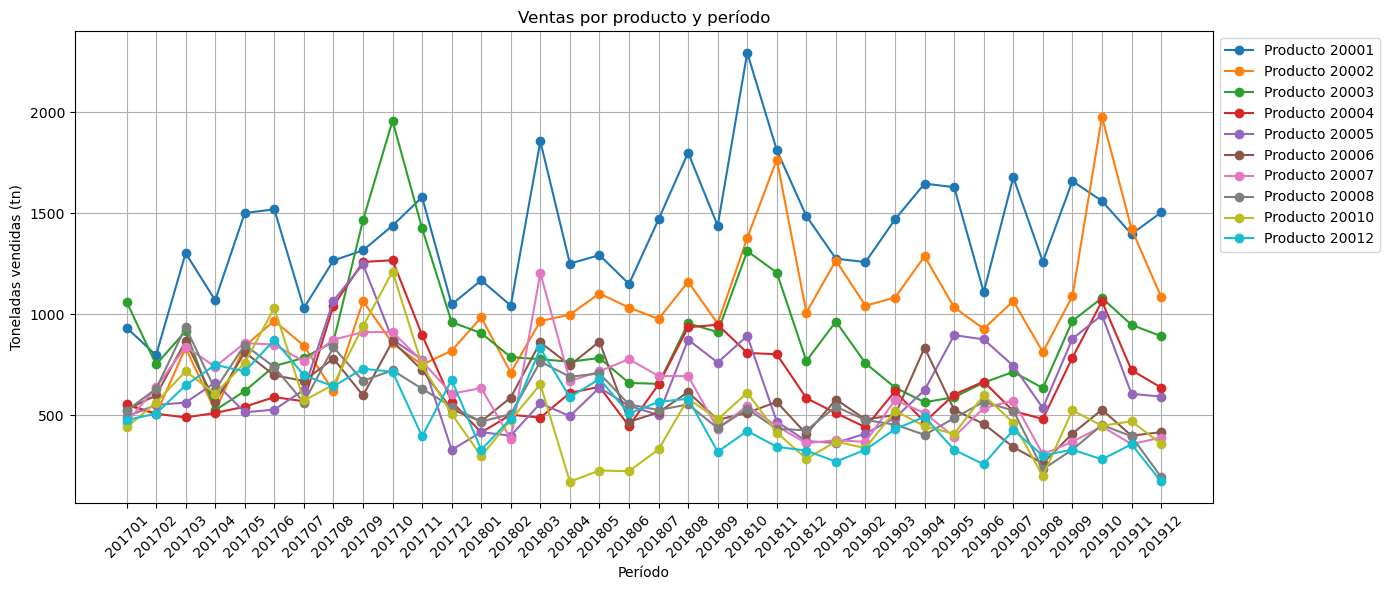

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo sell-in (ajustá la ruta si es necesario)
df_sellin = pd.read_csv(r'C:\Users\macar\Documents\Maestria Data Science - Austral\LABORATORIO 3\Datasets básicos iniciales Competencia\sell-in.txt', sep="\t")

# Agrupar por período y producto para sumar las toneladas vendidas
ventas_agrupadas = df_sellin.groupby(['product_id', 'periodo'])['tn'].sum().reset_index()

# Convertir período a string si querés que en el eje x aparezca tipo '2017-01'
ventas_agrupadas['periodo'] = ventas_agrupadas['periodo'].astype(str)

# Crear gráfico
plt.figure(figsize=(14, 6))

# Opcional: limitar a los 10 productos más vendidos para no saturar el gráfico
top_productos = ventas_agrupadas.groupby('product_id')['tn'].sum().nlargest(10).index
ventas_top = ventas_agrupadas[ventas_agrupadas['product_id'].isin(top_productos)]

# Graficar por cada producto
for product_id in ventas_top['product_id'].unique():
    datos = ventas_top[ventas_top['product_id'] == product_id]
    plt.plot(datos['periodo'], datos['tn'], marker='o', label=f'Producto {product_id}')

plt.title('Ventas por producto y período')
plt.xlabel('Período')
plt.ylabel('Toneladas vendidas (tn)')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.grid(True)
plt.show()